In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [6]:
SAMPLE_NUMBER = 1
image_dir = Path.cwd()/"samples"/str(SAMPLE_NUMBER)
IMAGES = [x for x in image_dir.iterdir() if x.suffix == ".jpg"]

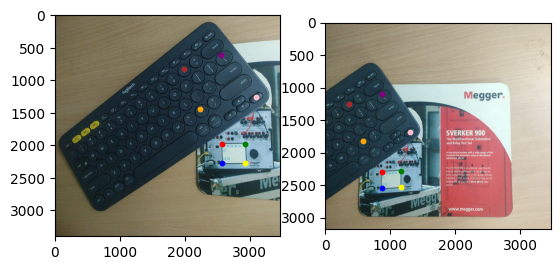

In [7]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown']

coords = np.load(str(image_dir/"points.npy"))

fig, ax = plt.subplots(1, len(IMAGES))
for i in range(len(IMAGES)):
    img = plt.imread(str(IMAGES[i]))
    ax[i].imshow(img)

for i in range(len(coords)):
    color = colors[i]
    x1, y1 = coords[i][0]
    x2, y2 = coords[i][1]
    ax[0].scatter(x1, y1, color=color, s=10)
    ax[1].scatter(x2, y2, color=color, s=10)
    

In [4]:
def solver(COORDS):
    '''
    COORDS : Nx2x2 array of coordinates
    x', y' = COORDS[i][0]
    x, y = COORDS[i][1]
    '''
    n, _, _ = COORDS.shape
    A = []
    B = []
    for i in range(n):
        x_, y_ = COORDS[i][0]
        x, y = COORDS[i][1]
        
        a = np.array([
            [x,y,1,0,0,0,-x*x_,-y*x_],
            [0,0,0,x,y,1,-x*y_,-y*y_]
        ])
        b = np.array([x_, y_])
        A.append(a)
        B.append(b)

    A = np.vstack(A)
    B = np.hstack(B)
    
    H = np.linalg.lstsq(A, B, rcond=None)[0]
    H = np.append(H, 1)
    H.resize((3,3))
    return H

In [8]:
print(coords)

[[[2564 1982]
  [ 871 2296]]

 [[2917 1979]
  [1159 2280]]

 [[2576 2274]
  [ 869 2547]]

 [[2928 2274]
  [1156 2528]]

 [[2238 1432]
  [ 581 1817]]

 [[2553  613]
  [ 872 1099]]

 [[3100 1259]
  [1302 1679]]

 [[1992  823]
  [ 363 1253]]]
